# Sentiment analysis

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.

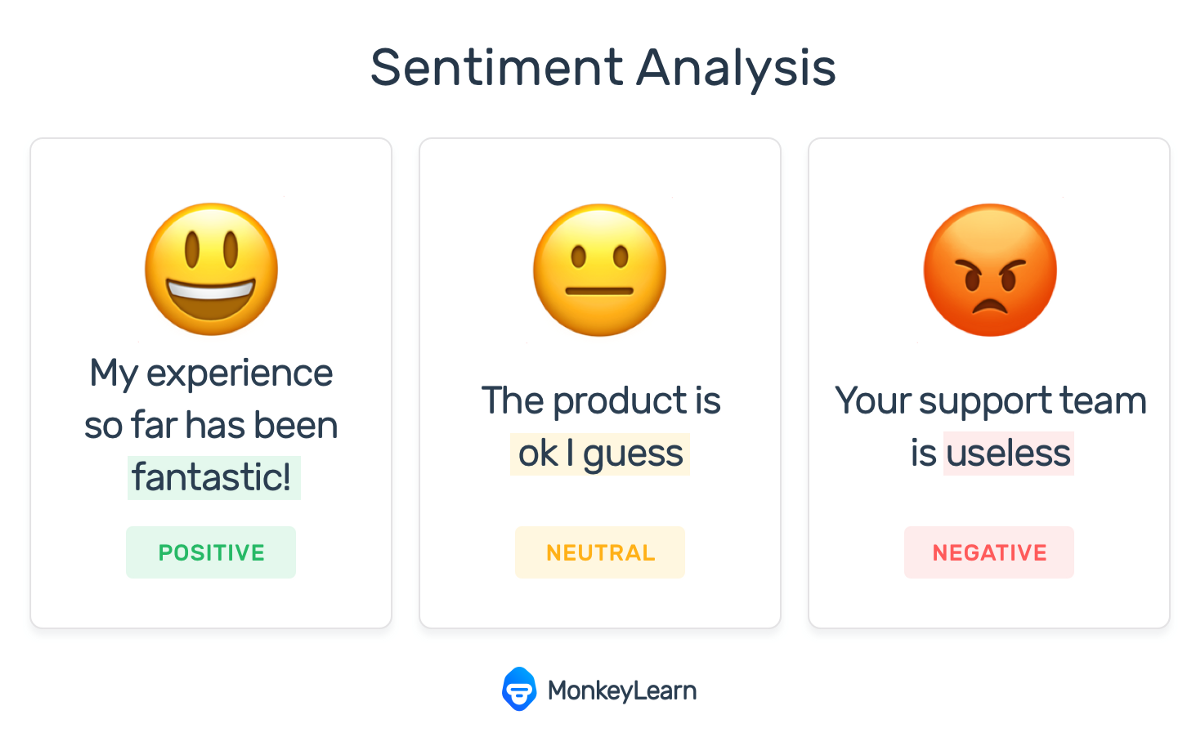

#### Loading the dataset and all the necessary required libraries

In [5]:
import numpy as np
import sklearn as sk
import pandas as pd
import nltk.corpus
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from numpy.linalg import norm
import numpy as np

# Text Cleaning
## Read the File First
trainFile = "./data/train_data.txt"
testFile = "./data/test_data.txt"

df = pd.read_csv(trainFile, header=None, sep="\t|\.\s\t", index_col=False, names=["v", "txt"], dtype={"txt":str})

test = pd.read_csv(testFile, header=None, index_col=False, names=["txt"], dtype={"txt":str})
df["v"] = df["v"].astype(int)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-5-6f8d18b7df2d>:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(trainFile, header=None, sep="\t|\.\s\t", index_col=False, names=["v", "txt"], dtype={"txt":str})


## Pre-processing the dataset

#### Removing stopwords

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.


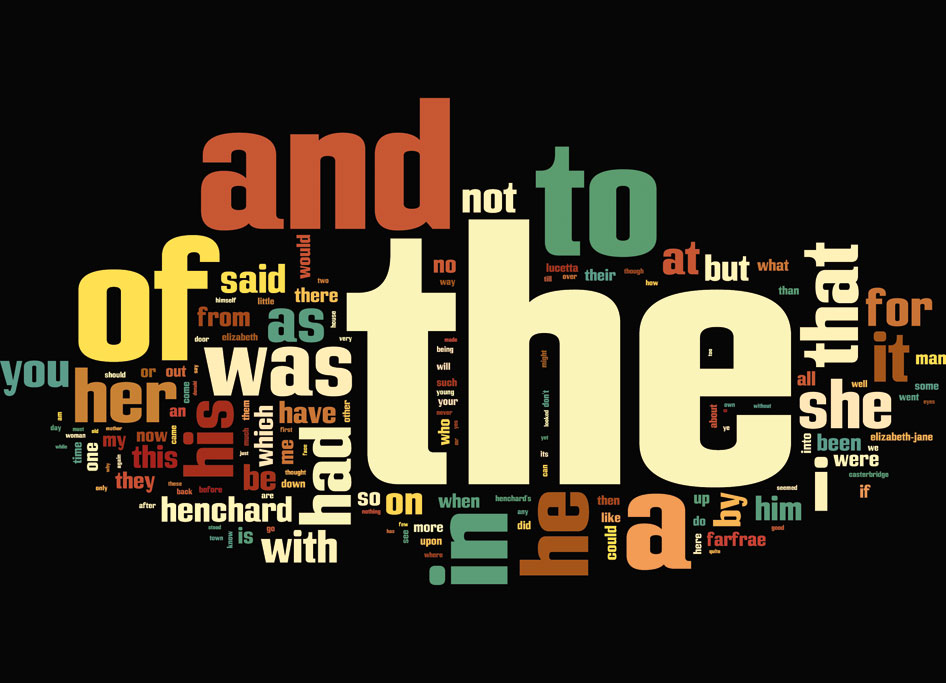


#### Stemming

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.Stemming is a part of linguistic studies in morphology and artificial intelligence (AI) information retrieval and extraction.





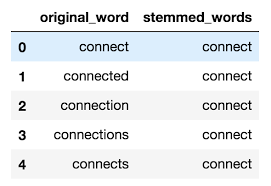

#### Tokenization

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

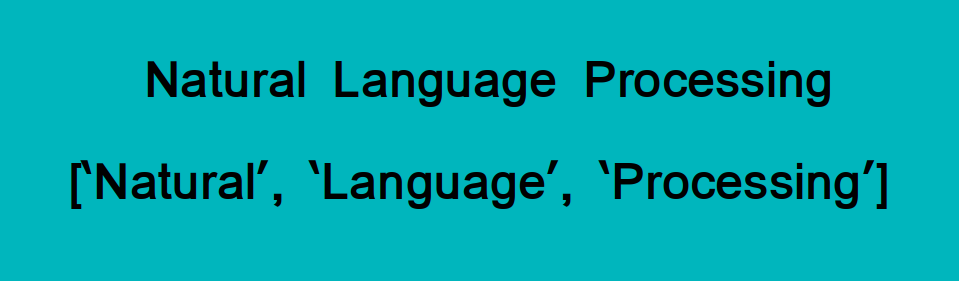

In [6]:
def preprocess_text(dataframe, column):
    final = dataframe.copy(deep=True)
    #Remove unhelpful rows: duplicates, empty rows,
    final[column] = final[column].str.lower()
    final[column] = final[column].str.replace(pat=r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\d+", repl="", regex=True)
    final = final.drop_duplicates(subset=[column], keep='first', inplace=False)
    final.dropna(inplace=True)

    return final

def remove_stopwords(dataframe, column):
    final = dataframe.copy(deep=True)

    stop = stopwords.words('english')
    final[column] = final[column].apply(lambda x: " ".join([item for item in x.split() if item not in stop]))
    final.dropna(inplace=True)

    return final

def snowball_stemmer(dataframe, column):
    final = dataframe.copy(deep=True)

    stemmer = SnowballStemmer("english")
    final[column] = final[column].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split() if word in x]))
    final.dropna(inplace=True)

    return final

def tokenize_words(dataframe, column):
    final = dataframe.copy(deep=True)

    final[column] = final[column].apply(lambda x:  re.split(r"\s", x))
    final.dropna(inplace=True)

    return final

df = preprocess_text(df, "txt")
df = remove_stopwords(df, "txt")
df = snowball_stemmer(df, "txt")


In [7]:

df.head()

,v,txt
0,-1,german filmmak ulli lommel manag task mani hor...
1,1,excel thriller turkey make sensegreat job gokb...
2,1,final uncut version babi face surfac sourc lib...
3,1,glorious tell weekend share among literari gre...
4,1,dog bite dog isnt go everyon realli enjoy full...


### Visualizing the frequency of the classes

<AxesSubplot:>

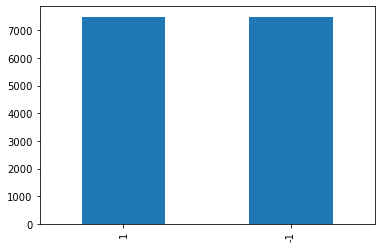

In [8]:
from matplotlib import pyplot as plt 

Frequency = df['v'].value_counts()
Frequency.plot.bar()


#### It could be observed the dataset is perfeclt balanced

### Converting text to fetaure vectors
Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.


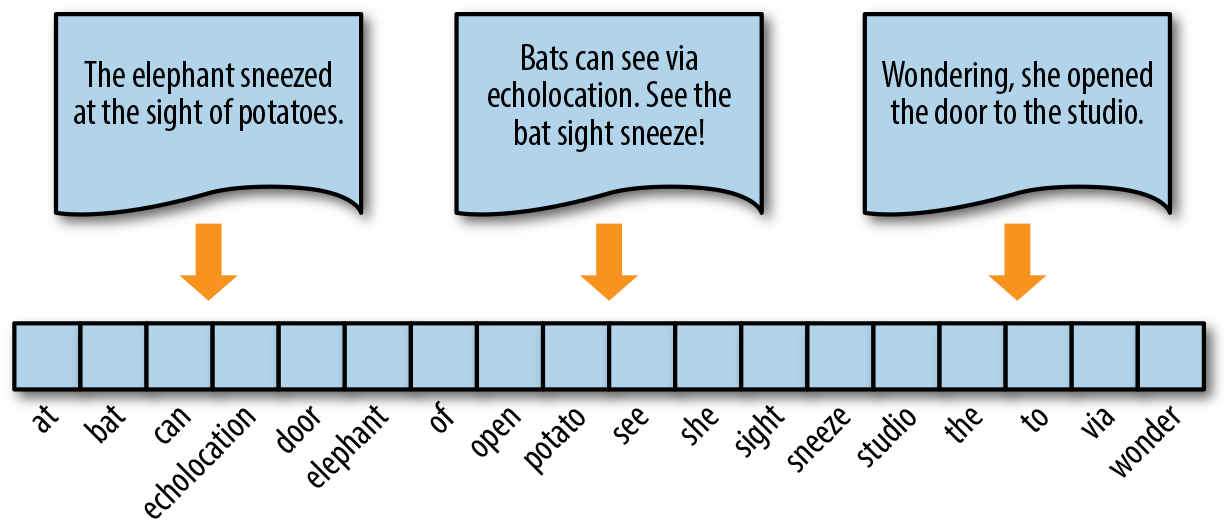

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Creating a tranform
cv = CountVectorizer(ngram_range=(1,3), max_features = 5000)
#cv = TfidfVectorizer()

X = cv.fit_transform(df['txt']).toarray()
y = df['v']

# Since the length of the sentences is very large we are have a big number of features for the seneteceWord Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.


### Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


### Building KNN from scratch as per ssignment requirement

in case of balanced class. Accuracy can be a perfect metric to consider

In [14]:
from tqdm.notebook import tqdm
class KNN():
    def __init__(self, k):
        self.n_neighbors = k   
        
    def euclidean_distance(self, a, b):
         return np.linalg.norm(a-b)
    
    def fit_knn(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
            # initialize prediction_knn as empty list
            prediction_knn = []
            # euclidian_distances = []
            for index in tqdm(range(len(X))):  # Main loop iterating through len(X)
                euclidian_distances = []
                for row in self.X_train:
                    eucl_distance = self.euclidean_distance(row, X[index])
                    euclidian_distances.append(eucl_distance)
                neighbors = np.array(euclidian_distances).argsort()[: self.n_neighbors]
                # initialize dict to count class occurrences in y_train
                count_neighbors = {}
                for val in neighbors:
                    if self.y_train[val] in count_neighbors:
                        count_neighbors[self.y_train[val]] += 1
                    else:
                        count_neighbors[self.y_train[val]]  = 1
                # max count labels to prediction_knn
                prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

            return prediction_knn
    
    


### Fitting the model

In [15]:
model = KNN( k = 3 )
model.fit_knn(np.asarray(X_train),np.asarray(y_train))

### Lets check the accuracy on the validation data

In [16]:
y_val_predict = model.predict(X_val)


  0%|          | 0/1498 [00:00<?, ?it/s]

### Printing the classification report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

          -1       0.56      0.65      0.60       716
           1       0.63      0.54      0.58       782

    accuracy                           0.59      1498
   macro avg       0.59      0.59      0.59      1498
weighted avg       0.60      0.59      0.59      1498



### Plotting the confusion matrix

<AxesSubplot:>

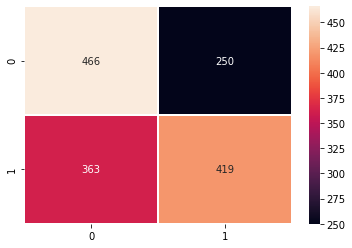

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_val, y_val_predict)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')


## Lets try some other feature engineering method to improve the performance

In this approach we are going to use pretrained bert for the creation of the vectors

In [24]:
from sentence_transformers import SentenceTransformer
model_vector = SentenceTransformer('all-MiniLM-L6-v2')

def convert_text_to_vector(sentence):
    sentence_embeddings = model_vector.encode(sentence)
    return sentence_embeddings

In [25]:
X = []

for text in tqdm(df['txt']):
    X.append(convert_text_to_vector(text))

y = df['v']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=12)



model2 = KNN( k = 3 )
model2.fit_knn(np.asarray(X_train),np.asarray(y_train))
# GETTING CLASSIFICATION REPORT
y_val_predict = model2.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

  0%|          | 0/14975 [00:00<?, ?it/s]

  0%|          | 0/1498 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          -1       0.72      0.76      0.74       751
           1       0.74      0.71      0.73       747

    accuracy                           0.73      1498
   macro avg       0.73      0.73      0.73      1498
weighted avg       0.73      0.73      0.73      1498



Plotting the confusion matrix

<AxesSubplot:>

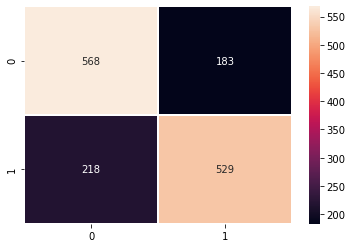

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_val, y_val_predict)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')


### Lets try pre-trained models from the spacy library to vectorize the text data

In [27]:
import spacy
nlp = spacy.load('en_core_web_md')
def convert_text_to_vector2(sentence):
    doc = nlp(sentence)
    return doc.vector

In [28]:
X = []

for text in tqdm(df['txt']):
    X.append(convert_text_to_vector2(text))

y = df['v']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=12)



model3 = KNN( k = 3 )
model3.fit_knn(np.asarray(X_train),np.asarray(y_train))
# GETTING CLASSIFICATION REPORT
y_val_predict = model3.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [02:03<00:00, 12.16it/s]

              precision    recall  f1-score   support

          -1       0.68      0.70      0.69       751
           1       0.69      0.67      0.68       747

    accuracy                           0.69      1498
   macro avg       0.69      0.69      0.69      1498
weighted avg       0.69      0.69      0.69      1498



Plottting the confusion matrix

<AxesSubplot:>

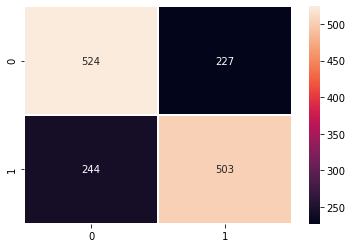

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_val, y_val_predict)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

## The best accuracy was achievd from pre-trained bert model

Further fine tunning the bert model



Here we are going to try different fine number of neighbours and see which suits this task best

In [41]:
for nb in range(3,10):
    print('Training the model for '+str(nb)+' neighbours')
    X = []
    for text in tqdm(df['txt']):
        X.append(convert_text_to_vector(text))
    y = df['v']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=12)

    model2 = KNN( k = nb )
    model2.fit_knn(np.asarray(X_train),np.asarray(y_train))
    # GETTING CLASSIFICATION REPORT
    y_val_predict = model2.predict(X_val)
    from sklearn.metrics import classification_report
    print(classification_report(y_val, y_val_predict))

  0%|                                                                                | 2/14975 [00:00<13:36, 18.35it/s]

Training the model for 3 neighbours


  0%|                                                                                | 2/14975 [00:00<15:50, 15.75it/s]

              precision    recall  f1-score   support

          -1       0.72      0.76      0.74       751
           1       0.74      0.71      0.73       747

    accuracy                           0.73      1498
   macro avg       0.73      0.73      0.73      1498
weighted avg       0.73      0.73      0.73      1498

Training the model for 4 neighbours


  0%|                                                                                | 2/14975 [00:00<13:43, 18.18it/s]

              precision    recall  f1-score   support

          -1       0.72      0.76      0.74       751
           1       0.74      0.70      0.72       747

    accuracy                           0.73      1498
   macro avg       0.73      0.73      0.73      1498
weighted avg       0.73      0.73      0.73      1498

Training the model for 5 neighbours


  0%|                                                                                | 2/14975 [00:00<15:35, 16.00it/s]

              precision    recall  f1-score   support

          -1       0.72      0.76      0.74       751
           1       0.75      0.71      0.73       747

    accuracy                           0.73      1498
   macro avg       0.73      0.73      0.73      1498
weighted avg       0.73      0.73      0.73      1498

Training the model for 6 neighbours


  0%|                                                                                | 2/14975 [00:00<13:58, 17.86it/s]

              precision    recall  f1-score   support

          -1       0.72      0.77      0.74       751
           1       0.75      0.69      0.72       747

    accuracy                           0.73      1498
   macro avg       0.73      0.73      0.73      1498
weighted avg       0.73      0.73      0.73      1498

Training the model for 7 neighbours


  0%|                                                                                | 2/14975 [00:00<12:58, 19.23it/s]

              precision    recall  f1-score   support

          -1       0.72      0.78      0.75       751
           1       0.76      0.69      0.72       747

    accuracy                           0.73      1498
   macro avg       0.74      0.73      0.73      1498
weighted avg       0.74      0.73      0.73      1498

Training the model for 8 neighbours


  0%|                                                                                | 2/14975 [00:00<16:13, 15.38it/s]

              precision    recall  f1-score   support

          -1       0.73      0.79      0.76       751
           1       0.77      0.70      0.73       747

    accuracy                           0.75      1498
   macro avg       0.75      0.75      0.75      1498
weighted avg       0.75      0.75      0.75      1498

Training the model for 9 neighbours


100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [02:00<00:00, 12.41it/s]

              precision    recall  f1-score   support

          -1       0.71      0.80      0.75       751
           1       0.77      0.67      0.72       747

    accuracy                           0.73      1498
   macro avg       0.74      0.73      0.73      1498
weighted avg       0.74      0.73      0.73      1498



### Now we have the optimal number of neighbours = 8 lets try cosine similarity as distance function and see which distance function works best. Lets define new KNN class with cosine similarity as distance function

In [42]:
from scipy import spatial
class KNN2():
    def __init__(self, k):
        self.n_neighbors = k   
        
    def _distance(self, a, b):
         return spatial.distance.cosine(a, b)
    
    def fit_knn(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
            # initialize prediction_knn as empty list
            prediction_knn = []
            # euclidian_distances = []
            for index in tqdm(range(len(X))):  # Main loop iterating through len(X)
                _distances = []
                for row in self.X_train:
                    _dist = self._distance(row, X[index])
                    _distances.append(_dist)
                neighbors = np.array(_distances).argsort()[: self.n_neighbors]
                # initialize dict to count class occurrences in y_train
                count_neighbors = {}
                for val in neighbors:
                    if self.y_train[val] in count_neighbors:
                        count_neighbors[self.y_train[val]] += 1
                    else:
                        count_neighbors[self.y_train[val]]  = 1
                # max count labels to prediction_knn
                prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

            return prediction_knn
    

In [43]:
model2 = KNN2( k = 8 )
model2.fit_knn(np.asarray(X_train),np.asarray(y_train))
# GETTING CLASSIFICATION REPORT
y_val_predict = model2.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [18:21<00:00,  1.36it/s]

              precision    recall  f1-score   support

          -1       0.73      0.79      0.76       751
           1       0.77      0.70      0.73       747

    accuracy                           0.75      1498
   macro avg       0.75      0.75      0.75      1498
weighted avg       0.75      0.75      0.75      1498



It is observed that through cosine similarity no major change is observed 

##### Now we are going to pre-process the test data. Produce feature engineering by Bert Pre-trained model. Predict the test data on model2 and produce the submission file as mentioned in the homework-pdf

In [31]:
test = preprocess_text(test, "txt")
test = remove_stopwords(test, "txt")
test = snowball_stemmer(test, "txt")

test.head()

,txt
0,michell pfeiffer star mob widow seek normal li...
1,definit movi peopl ask entertain overthink mov...
2,stranger train one film classic alway heard so...
3,usual love movi give good old b movi day one s...
4,movi becom icon standin great america br br fa...


### Getting the best model from above optimization

In [44]:
model = KNN( k = 8 )
model.fit_knn(np.asarray(X),np.asarray(y))

Lets do the feature engineering from the pre-trained bert model because bert performed best

In [45]:
TEST = []
for text in tqdm(test['txt']):
    TEST.append(convert_text_to_vector(text))


100%|████████████████████████████████████████████████████████████████████████████| 13991/13991 [02:53<00:00, 80.56it/s]


In [46]:
test_predictions = model.predict(np.asarray(TEST))

100%|████████████████████████████████████████████████████████████████████████████| 13991/13991 [21:30<00:00, 10.85it/s]


#### Creating the submission as per requirement in the homework

In [47]:
f = open("submission_file.txt", "w")


for pred in test_predictions:
    if pred == 1:
        f.write(str('+')+str(pred))
    else:
        f.write(str(pred))
    f.write('\n')

f.close()

## ANALYSIS


Knn was build from scratch multiple number of neighbours were applied as fine tunning/ hyper-parameter optimization. It was observed when number of neighbours = 8 . The classifier showed the best result.
Both cosine distance and euclidean distance was applied as the metric in the KNN no noticeable change in the performance was observed by changing metric